In [3]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy 
from wordcloud import WordCloud

In [3]:
# Loading the netflix data
# Assuming 'df' is your DataFrame
df = pd.read_csv(r'D:\Project\Personal project\data\Netflix\netflix.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#The Netflix dataset comprises 12 columns, with 11 columns being categorical and only one column being numerical. While 6 columns showingnull values.
#Insights
#keyboard_arrow_down
# Number of columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.shape

(8807, 12)

In [6]:
#Insights
#keyboard_arrow_down
# Display the first few rows of the DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
#Overview of head and tail combined of the netflix dataframe
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
# Summary statistics for columns
df.describe(include ='object')
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
#1.The majority of content on Netfl ix consists of movies, with 6131 out of 8807 items falling into this category. The remaining 30% comprises TVseries.
#2.Rajiv Chilaka tops the director list with 19 credits, specializing in animated movies for children.
#3.David Attenborough leads in actor appearances on Netfl ix, featuring in 19 fi lms and shows.
#4.The USA contributes the most content to Netfl ix, accounting for 35% of the total.
#5.January 1, 2020, marks the peak date for content additions on Netfl ix, with 109 new shows and movies added.
#6.Among the 17 different ratings on Netfl ix, "TV-MA" (Mature Audience Only) is the most common, covering nearly 36% of the platform's contentwith this rating.
#Insights
#keyboard_arrow_down
#Count unique values
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [10]:
#Handling null values
#keyboard_arrow_down
#checking number of null values
print('\nColumns with missing value:')
df.isnull().sum()


Columns with missing value:


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
#Total null values
df.isnull().sum().sum()

4307

In [12]:
#Adding missing values
#From our above analysis, there are total of 6 columns containing missing values.
#Director's column has the most missing values followed by cast and country column. Date added, ratings and duration have significantly less missing values
#Add missing values
df['director'].fillna('Unknown Director', inplace=True)
df['cast'].fillna('Unknown Cast', inplace=True)
df['country'].fillna('Unknown Country', inplace=True)
df['date_added'].fillna('0', inplace=True)
df['rating'].fillna('0', inplace=True)
df['duration'].fillna('0', inplace=True)

C:\Users\Ankit\AppData\Local\Temp\ipykernel_13060\293054721.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown Director', inplace=True)
C:\Users\Ankit\AppData\Local\Temp\ipykernel_13060\293054721.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [13]:
#*The director column has been updated to display 'Unknown Director', while the cast column now refl ects 'Unknown Cast', and the countrycolumn shows 'Unknown Country'
#*Whereas numerical columns like Date_added,rating,duration are replaced by 0.
#Rechecking null values again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
 #Adding new columns for better analysis
#keyboard_arrow_down
# converting date_added to datetime column
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')

In [15]:
#adding new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,38


In [16]:
#Un-nesting the columns
#Creating a new df which has un-nested director,cast and country columns into multiple rows for better analysis.
#Un-nesting the columns
#keyboard_arrow_down
#creating new table for storing unnested columns
df1 = copy.deepcopy(df)
df1["director"] = df["director"].str.split(", ")
df1["cast"] = df["cast"].str.split(", ")
df1["country"] = df["country"].str.split(", ")
df1["listed_in"] = df["listed_in"].str.split(", ")
df1 = df1.explode(['director'])
df1 = df1.explode(['cast'])
df1 = df1.explode(['country'])
df1 = df1.explode(['listed_in'])
df1.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,September,38


In [17]:
df1.shape

(201991, 15)

In [18]:
#Exploratory Analysis and Visualization
#keyboard_arrow_down
#1.Netfl ix Content By Type:
#Distribution of content across the different types
print(f'Names of types:\n{df["type"].unique()}')
print('\n')
print(f'Counts of Types:\n{df["type"].value_counts()}')

Names of types:
['Movie' 'TV Show']


Counts of Types:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


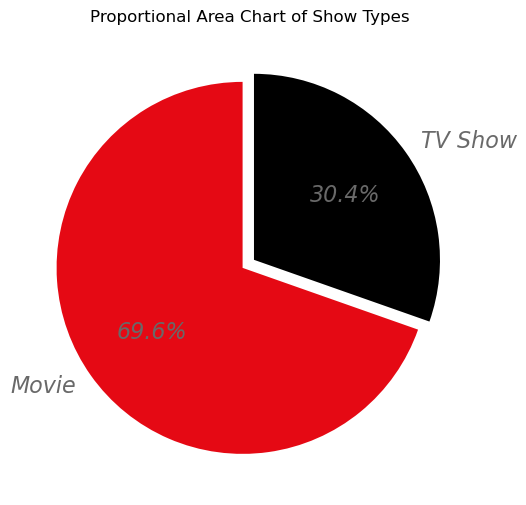

In [19]:
#Distribution of content across the different types using pie chart
plt.figure(figsize=(6,7))
plt.title("Proportional Area Chart of Show Types")
plt.pie(df.type.value_counts(), explode=(0.050,0.025), labels=df.type.value_counts().index,colors=['#e50914','Black'], autopct='%1.1f%%', textprops={'color':
"dimgrey",'fontsize':"16",'style':
"oblique"}, startangle=90)
plt.show()

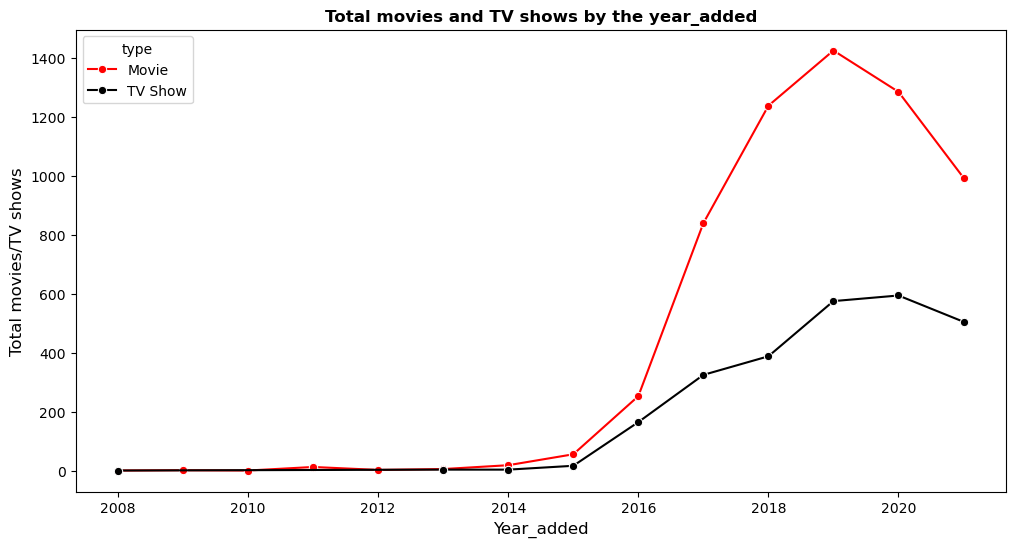

In [20]:
#How has the number of movies/TV shows added on Netfl ix per year changed over thetime?
h= df.groupby(['year_added','type'])['show_id'].count().reset_index()
h.rename({'show_id':'total movies/TV shows'}, axis =1, inplace =True)
plt.figure(figsize = (12,6))
sns.lineplot(data = h , x ='year_added', y ='total movies/TV shows', hue ='type', marker ='o', ms =6, palette=['red','black'])
plt.xlabel('Year_added', fontsize =12)
plt.ylabel('Total movies/TV shows', fontsize =12)
plt.title('Total movies and TV shows by the year_added', fontsize =12, weight ='bold')
plt.show()

In [ ]:
**Netflix experienced a significant surge in content additions after 2015.**
*The year 2019 witnessed the highest number of movies and TV shows added to Netflix.**
**Content additions in 2020 and 2021 declined, likely due to the pandemic.
**However, the drop in TV show additions was less drastic compared to movies.**

In [21]:
#2.Netflix count of rating types:
#Counts of Rating:
print(f'Names of Rating:\n{df["rating"].unique()}')
print('\n')
print(f'Counts of Rating:\n{df["rating"].value_counts()}')

Names of Rating:
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' '0' 'TV-Y7-FV' 'UR']


Counts of Rating:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
0              4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [22]:
# Remove duration-like entries that mistakenly appear in the 'rating' column
df['rating'].replace({'74 min': np.nan, '84 min': np.nan, '66 min': np.nan}, inplace=True)

# Display unique rating values
print("Unique Ratings:")
print(df["rating"].unique())

# Display counts of each rating
print("\nRating Counts:")
print(df["rating"].value_counts())

Unique Ratings:
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' nan 'NR' '0' 'TV-Y7-FV' 'UR']

Rating Counts:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
0              4
NC-17          3
UR             3
Name: count, dtype: int64


C:\Users\Ankit\AppData\Local\Temp\ipykernel_13060\2469797514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace({'74 min': np.nan, '84 min': np.nan, '66 min': np.nan}, inplace=True)


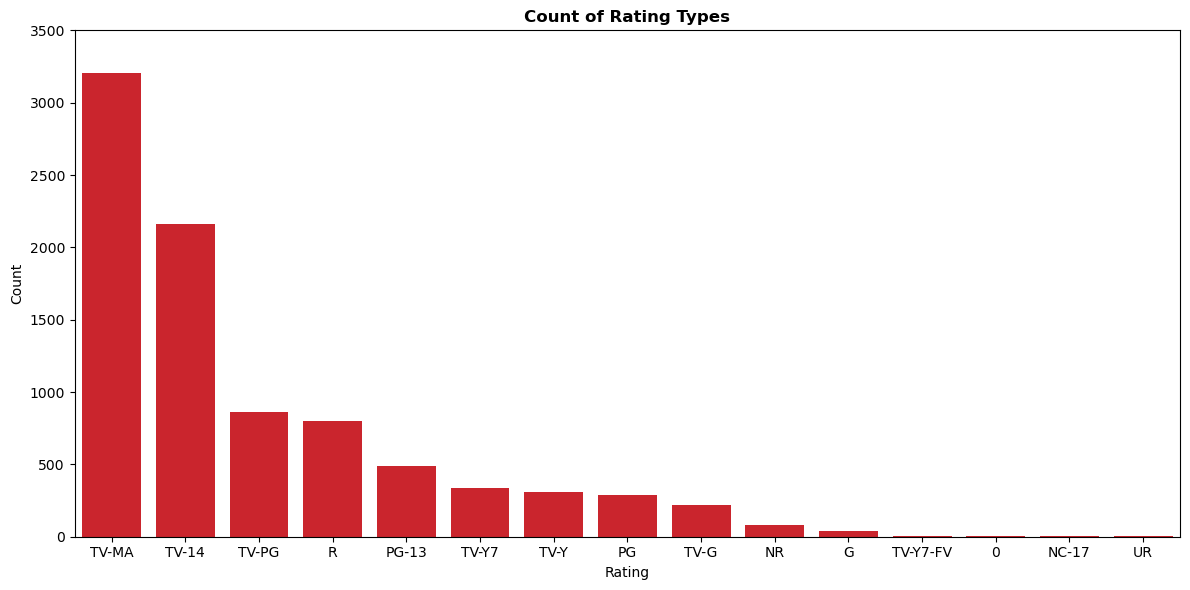

In [23]:
# Plot count of each rating type
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x="rating",
    color="#e50914",
    order=df['rating'].value_counts().index)

# Optional: Rotate x-axis labels for clarity
plt.xticks(rotation=0)

# Set y-axis limit and optional ticks
plt.ylim(0, 3500)
# plt.yticks(range(0, 3501, 250))  # Optional: custom y-axis ticks

# Titles and labels
plt.title("Count of Rating Types", weight='bold')
plt.xlabel("Rating")
plt.ylabel("Count")

# Display plot
plt.tight_layout()
plt.show()

**TV-MA, TV-14, TV-PG are top 3 types of rating with highest count.**

**3.Names and count of genre**

In [26]:
# Names and count of genres in the unnested DataFrame
print(f"Names of Genre:\n{df1['listed_in'].nunique()}")
print('\n')
print(f"Counts of Genre:\n{df1['listed_in'].value_counts()}")

Names of Genre:
42


Counts of Genre:
listed_in
Dramas                          29775
International Movies            28211
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Ko

**42 different genre are present in netfl ix. As the list extracted from unlisted it has higher count, hence didnt plot any graph.**

In [28]:
#4.Names and number of country
#names of countrys
# Print number of unique countries
print(f"Names of Country:\n{df1['country'].nunique()}\n")

# Print count of each country
print("Counts of Country:\n")
print(df['country'].value_counts())

Names of Country:
128

Counts of Country:

country
United States                             2818
India                                      972
Unknown Country                            831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64


**We see that many movies are produced in more than 1 country. Hence, the country column has comma separated values of countries.
This makes it diffi cult to analyse how many movies were produced in each country. We can use explode function in pandas to split the countrycolumn into different rows.**

In [30]:
# Create a country-level analysis table
country_tb = df.loc[:, ['show_id', 'type', 'country']]

# Remove rows with missing country values
country_tb.dropna(inplace=True)

# Split entries with multiple countries into lists
country_tb['country'] = country_tb['country'].apply(lambda x: x.split(','))

# Explode the list into separate rows (one country per row)
country_tb = country_tb.explode('country')

# Strip whitespace from country names
country_tb['country'] = country_tb['country'].str.strip()

# Display the result
country_tb.head()
country_tb["country"].value_counts()

country
United States      3690
India              1046
Unknown Country     831
United Kingdom      806
Canada              445
                   ... 
Ecuador               1
Armenia               1
Mongolia              1
Bahamas               1
Montenegro            1
Name: count, Length: 124, dtype: int64

**5.Checking the unique values for columns
Type
Release year
Rating
Duration**

In [32]:
# Checking the unique values for selected columns
for i in ['type', 'release_year', 'rating', 'duration']:
    print(f"Unique values in '{i}' column are:")
    print(df[i].unique())
    print('-' * 70)

Unique values in 'type' column are:
['Movie' 'TV Show']
----------------------------------------------------------------------
Unique values in 'release_year' column are:
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
----------------------------------------------------------------------
Unique values in 'rating' column are:
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' nan 'NR' '0' 'TV-Y7-FV' 'UR']
----------------------------------------------------------------------
Unique values in 'duration' column are:
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons

**5.Checking the value_counts for columns
Type
Release year
Rating
Duration**


In [34]:
# Checking value counts for selected columns
for i in ['type', 'release_year', 'rating', 'duration']:
    print(f"Value counts in '{i}' column are:")
    print(df[i].value_counts())
    print('-' * 70)

Value counts in 'type' column are:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
----------------------------------------------------------------------
Value counts in 'release_year' column are:
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64
----------------------------------------------------------------------
Value counts in 'rating' column are:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
0              4
NC-17          3
UR             3
Name: count, dtype: int64
----------------------------------------------------------------------
Value counts in 'duration' column are:
duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min 

**Comparison of tv shows vs. movies.**

In [36]:
# Filter only movies from the exploded df1
df_movie = df1[df1['type'] == 'Movie']

# Group by country and count unique movie titles
df_movie = (
    df_movie.groupby('country')['title']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
    .head(11)  # Get top 11 to drop the "Unknown Country" next
)

# Drop the row with "Unknown Country" (assuming it's at index 3)
df_movie = df_movie.drop(index=3)

# Replace long country names with short forms
df_movie['country'] = df_movie['country'].replace({
    'United States': 'USA',
    'United Kingdom': 'UK',
    'South Korea': 'S Korea'
})

# Display the result
df_movie

,country,title
0,USA,2751
1,India,962
2,UK,532
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114
10,Mexico,111


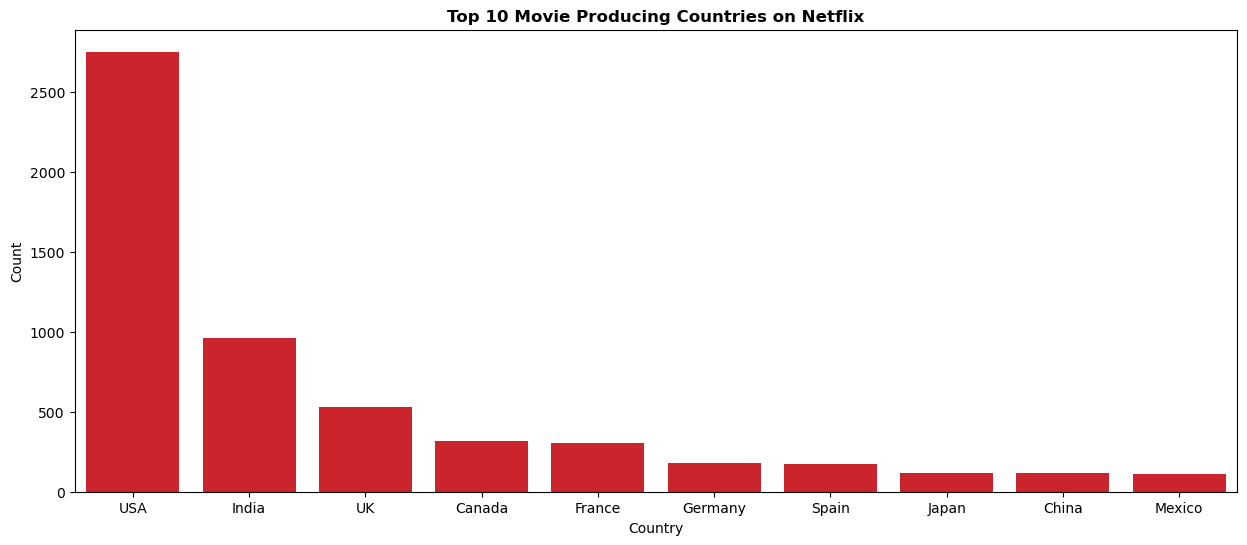

In [37]:
#Number of Movies produced in Country
plt.figure(figsize=(15, 6)) # Set the figure size
sns.barplot(data=df_movie, x='country',y='title', color="#e50914")
plt.xticks(rotation=0)
plt.title("Top 10 Movie Producing Countries on Netflix",weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

**Above barplot reveals Number of Movies produced in Top 10 Countries, in which USA scores highest rank followed by India and UK.**

C:\Users\Ankit\AppData\Local\Temp\ipykernel_13060\4098816662.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='country', data=df_tv, palette='mako')


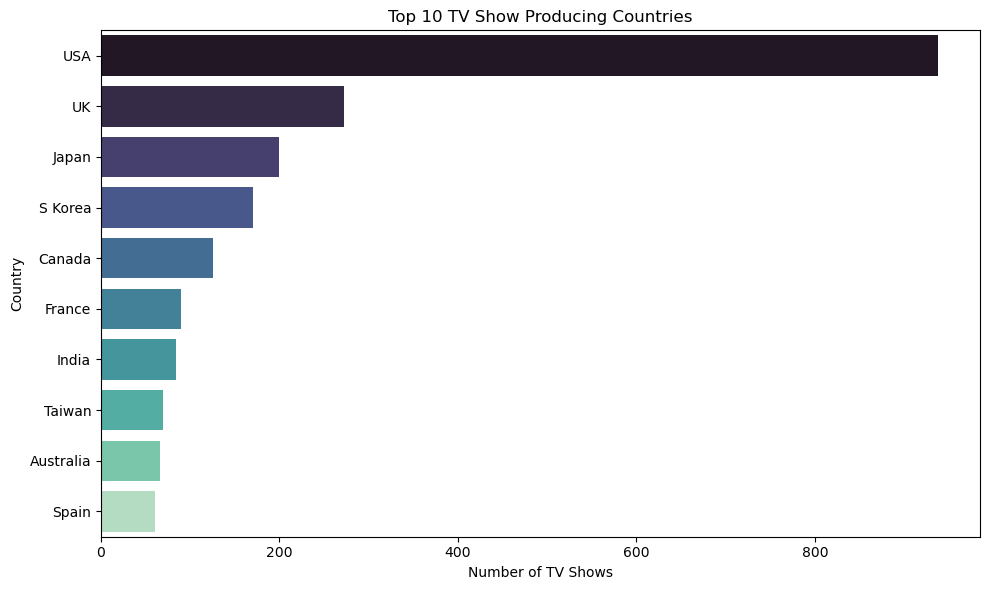

In [39]:
# Filter only TV Shows
df_tv = df1[df1['type'] == 'TV Show']

# Group by country and count unique TV Show titles
df_tv = (
    df_tv.groupby('country')['title']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
    .head(11)  # Take top 11 to drop 'Unknown Country' later
)

# Drop the row with "Unknown Country" (assuming it's at index 1)
df_tv = df_tv.drop(index=1)

# Replace country names with short forms
df_tv['country'] = df_tv['country'].replace({
    'United States': 'USA',
    'United Kingdom': 'UK',
    'South Korea': 'S Korea'
})

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='title', y='country', data=df_tv, palette='mako')
plt.title('Top 10 TV Show Producing Countries')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**What is the best time to launch a TV show?**

In [41]:
# Best week to release the TV show or movie
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Extract the week number (1–52) and store in a new column
df['week_added'] = df['date_added'].dt.isocalendar().week
week = df.groupby('week_added')['type'].value_counts()
week.name = 'count'  # Naming the series column

# To avoid error while doing reset_index
week = week.reset_index()
week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week_added  106 non-null    UInt32
 1   type        106 non-null    object
 2   count       106 non-null    int64 
dtypes: UInt32(1), int64(1), object(1)
memory usage: 2.3+ KB


In [42]:
#changing the week_added datatype to int
week['week_added'] = week['week_added'].astype('int64')
week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week_added  106 non-null    int64 
 1   type        106 non-null    object
 2   count       106 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [43]:
# creating two different tables for movies and tv shows
week_movie = week.loc[week['type'] == 'Movie'].sort_values(by = 'week_added')
week_tv = week.loc[week['type'] == 'TV Show'].sort_values(by = 'week_added')

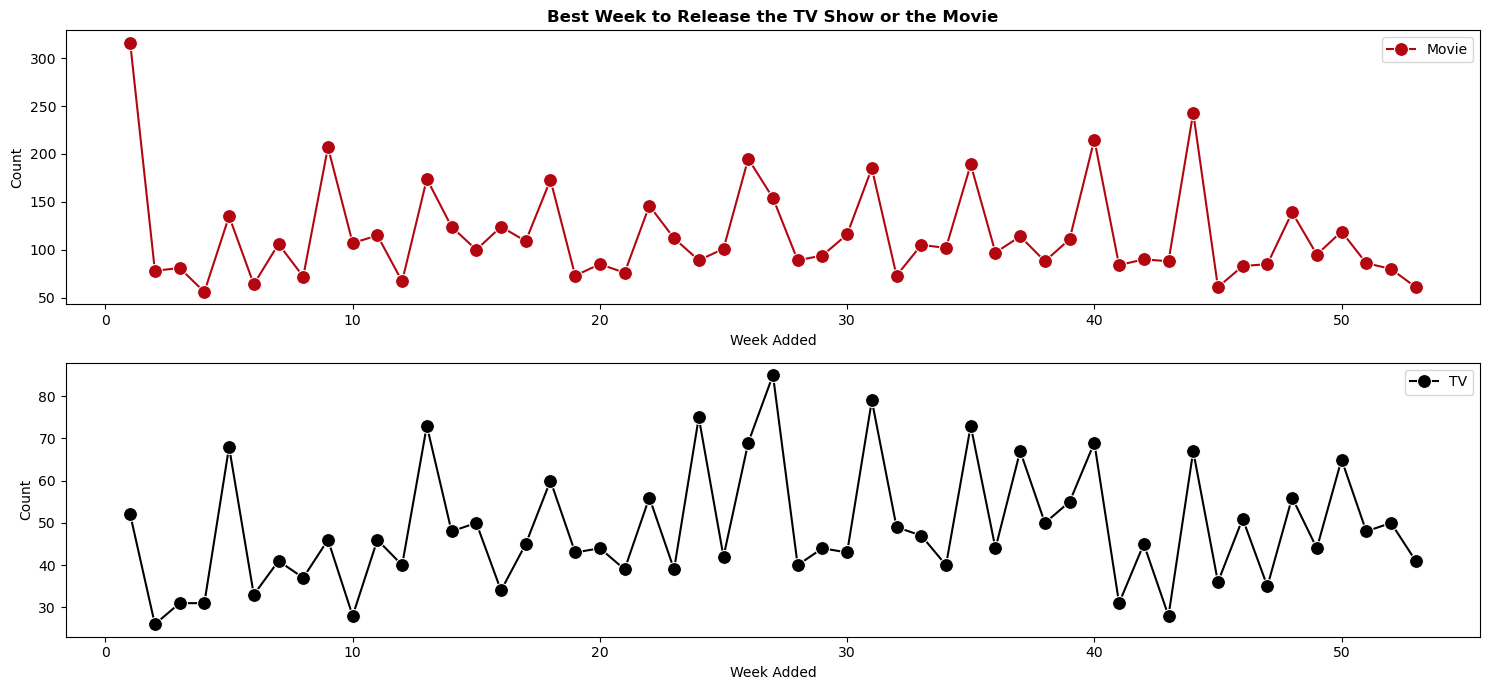

In [44]:
# Create figure
fig = plt.figure(figsize=(15, 7))

# First subplot: Movies
plt.subplot(2, 1, 1)
plt.title("Best Week to Release the TV Show or the Movie", weight='bold')
sns.lineplot(
    data=week_movie, 
    x='week_added', 
    y='count',
    marker='o', 
    markersize=10,
    color='#b20710',
    label='Movie'
)
plt.xlabel('Week Added')
plt.ylabel('Count')

# Second subplot: TV Shows
plt.subplot(2, 1, 2)
sns.lineplot(
    data=week_tv, 
    x='week_added', 
    y='count',
    marker='o', 
    markersize=10,
    color='black',
    label='TV'
)
plt.xlabel('Week Added')
plt.ylabel('Count')

# Display plots
plt.tight_layout()
plt.show()

**The highest volume of movies are typically uploaded during the initial week of the year.**
**The highest volume of TV shows tends to be added in the 26th week (around June end)**

In [46]:
#Best Month to launch a TV show/Movie?
# Ensure datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create 'month_added' column (e.g., January, February)
df['month_added'] = df['date_added'].dt.month_name()
month = df.groupby('month_added')['type'].value_counts()
month.name ='count'
# to avoid error while doing reset_index
month = month.reset_index()

In [47]:
# Define chronological order of months
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'month_added' to a categorical type with proper order
df['month_added'] = pd.Categorical(df['month_added'], categories=months, ordered=True)

# Display the result
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,38
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September,38
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September,38


**There is a clear link between content uploads and holiday seasons, as evidenced by signifi cant increases in content additions during Januaryand December.**
**Additionally, higher numbers of content uploads are observed in July, August, October, and December, while February, May, and November seerelatively lower upload counts.**
**The highest volume of movies are typically uploaded during the initial week of the year.**
**The highest volume of TV shows tends to be added in the 26th week (around June end)**

In [49]:
# Top 10 directors who have appeared in most movies or TV shows.

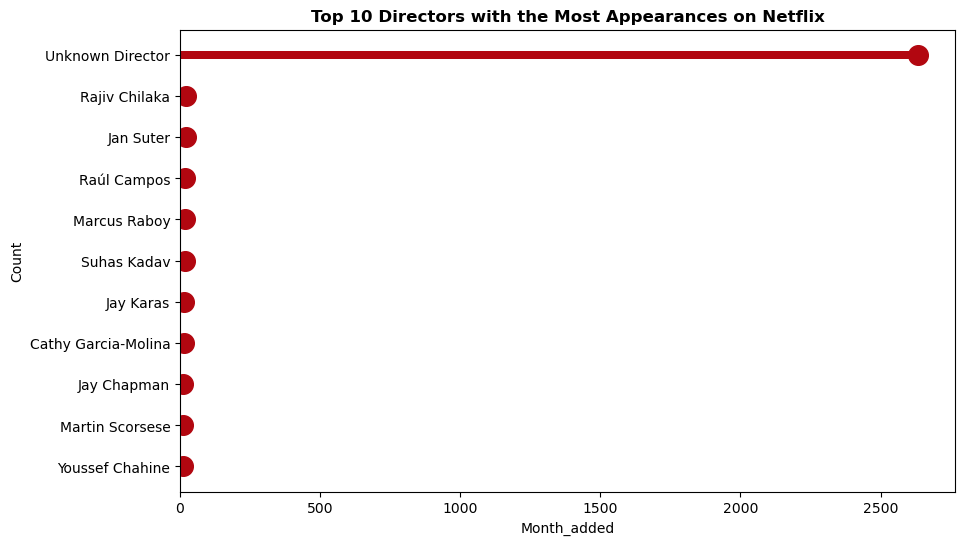

In [50]:
d_cnt = df1.groupby('director')['title'].nunique().sort_values(ascending =False)[0:11].reset_index()
d_cnt
plt.subplots(figsize=(10, 6))

# Horizontal bar chart
plt.barh(
    y=d_cnt['director'][::-1],
    width=d_cnt['title'][::-1],
    height=0.2,
    color='#b20710'
)

# Scatter plot overlay
plt.scatter(
    y=d_cnt['director'][::-1],
    x=d_cnt['title'][::-1],
    s=200,
    color='#b20710'
)

# Title and labels
plt.title("Top 10 Directors with the Most Appearances on Netflix", weight='bold')
plt.xlabel('Month_added')
plt.ylabel('Count')

# Show the plot
plt.show()

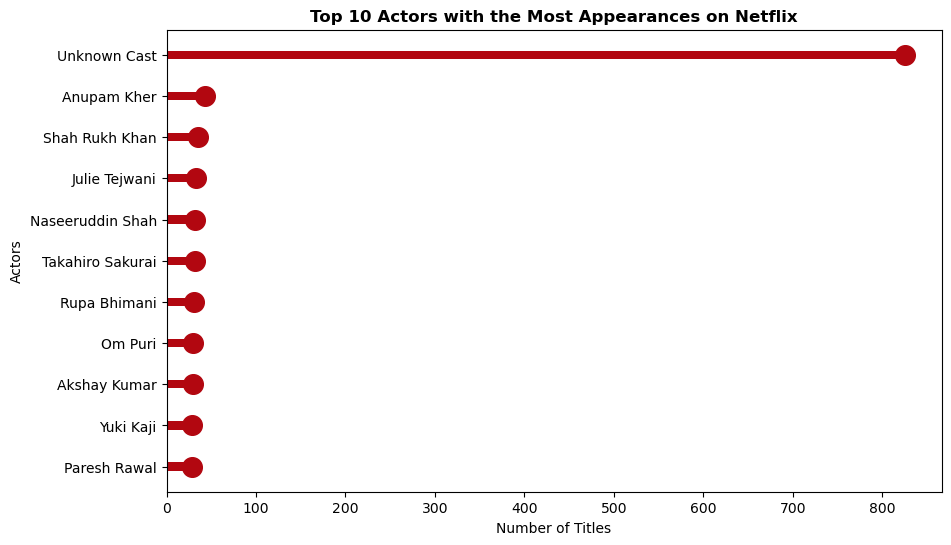

In [51]:
#Top 10 Actors who have appeared in most movies or TV shows.
a_cnt = (
    df1.groupby('cast')['title']
    .nunique()
    .sort_values(ascending=False)
    .head(11)  # selects top 11
    .reset_index()
)

a_cnt
plt.subplots(figsize=(10, 6))

# Horizontal bar chart for top 10 actors
plt.barh(
    y=a_cnt['cast'][::-1],
    width=a_cnt['title'][::-1],
    height=0.2,
    color='#b20710'
)

# Scatter plot overlay
plt.scatter(
    y=a_cnt['cast'][::-1],
    x=a_cnt['title'][::-1],
    s=200,
    color='#b20710'
)

# Title and axis labels
plt.title("Top 10 Actors with the Most Appearances on Netflix", weight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')

# Show the plot
plt.show()

**Top 3 ranked directors are Rajiv Chilaka,Jan Suter, Raúl Campos.**
**Signifi cantly, 8 out of the top 10 Actors with the highest number of appearances on Netfl ix are of Indian origin.**
**Top 3 ranked actors are Anupam Kher,Shah Rukh Khan,Julie Tejwan.**

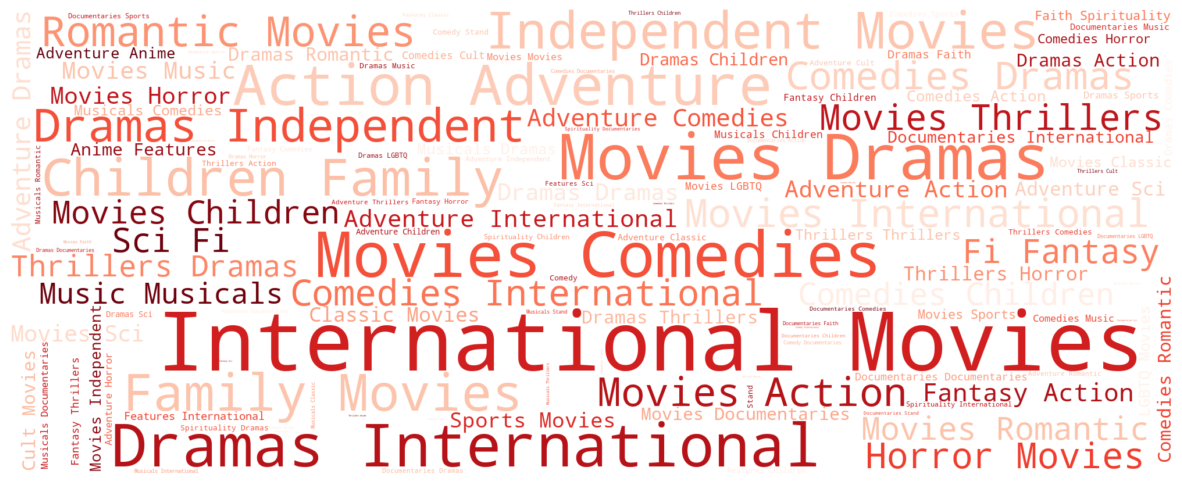

In [53]:
#Which genre movies are more popular or produced more?
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for only Movies
movie_genre = df1[df1['type'] == 'Movie']

# Prepare text for WordCloud
text = str(list(movie_genre['listed_in']))
text = text.replace(',', '').replace("'", '').replace('"', '').replace('[', '').replace(']', '')

# Set color palette
color = sns.color_palette("dark:red", as_cmap=True)  # Note: WordCloud expects a string colormap, not seaborn palette

# Generate the WordCloud
wordcld = WordCloud(
    max_words=150,
    width=2000,
    height=800,
    background_color='white',
    colormap='Reds'  # Use a valid matplotlib colormap name
).generate(text)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcld, interpolation='bilinear')
plt.axis('off')
plt.show()

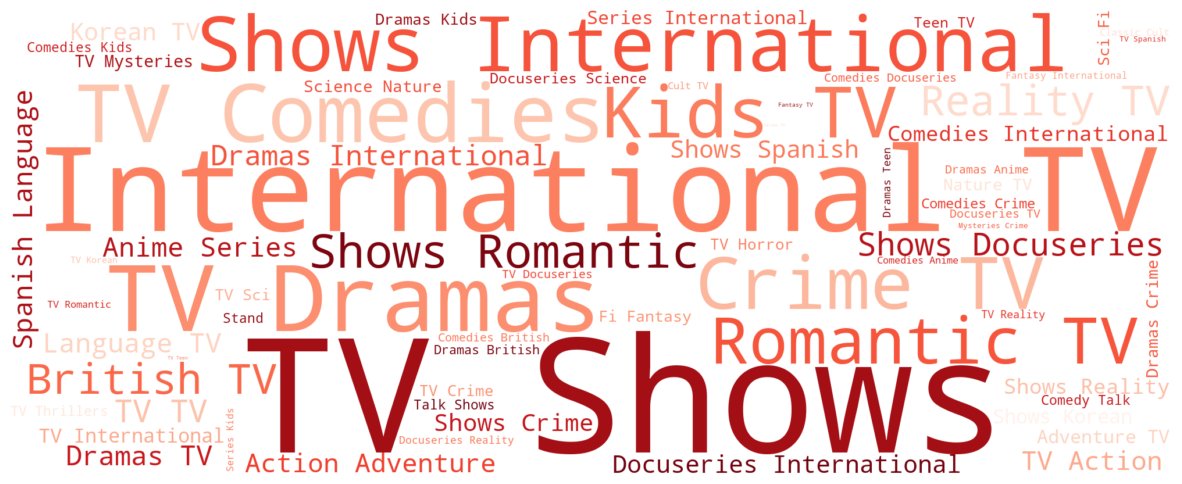

In [54]:
# Filter for TV Shows
tv_genre = df[df['type'] == 'TV Show']

# Prepare text for WordCloud
text = str(list(tv_genre['listed_in']))
text = text.replace(',', '').replace("'", '').replace('"', '').replace('[', '').replace(']', '')

# WordCloud colormap must be a valid string, not a seaborn object
# Use a matplotlib colormap like 'Reds', 'Blues', etc.
wordcld = WordCloud(
    max_words=150,
    width=2000,
    height=800,
    background_color='white',
    colormap='Reds'  # Fixed the colormap issue
).generate(text)

# Plot the WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcld, interpolation='bilinear')
plt.axis('off')
plt.show()

#Popular Movie genres on Netfl ix include International Movies, Comedies, Dramas, Action, and Romantic fi lms.
#Among TV Shows on Netfl ix, popular genres encompass Drama, Crime, Romance, Kids' content, Comedies, and International series.

In [56]:
#Find After how many days the movie will be added to Netfl ix after the release of the movie.
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Create release date from 'release_year' assuming Jan 1st as default release date
df['release_date'] = pd.to_datetime(df['release_year'], format="%Y", errors='coerce')

# Calculate days between release and addition to Netflix
df['days_to_netflix'] = (df['date_added'] - df['release_date']).dt.days

# Print data types
print(df['year_added'].dtype)
print(df['release_year'].dtype)

# View the result
df[['title', 'release_year', 'date_added', 'days_to_netflix']].head()

float64
int64


,title,release_year,date_added,days_to_netflix
0,Dick Johnson Is Dead,2020,2021-09-25,633.0
1,Blood & Water,2021,2021-09-24,266.0
2,Ganglands,2021,2021-09-24,266.0
3,Jailbirds New Orleans,2021,2021-09-24,266.0
4,Kota Factory,2021,2021-09-24,266.0


In [57]:
df['year_added'] = pd.to_datetime(df['year_added'], format='%Y')

In [58]:

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Convert 'release_year' to datetime (Jan 1st of the release year)
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')

# Calculate the difference in days
df['Difference'] = (df['date_added'] - df['release_year']).dt.days

# Create the summary table
table = df.loc[:, ['show_id', 'release_year', 'year_added', 'Difference']]
table.head()

,show_id,release_year,year_added,Difference
0,s1,2020-01-01,2021.0,633.0
1,s2,2021-01-01,2021.0,266.0
2,s3,2021-01-01,2021.0,266.0
3,s4,2021-01-01,2021.0,266.0
4,s5,2021-01-01,2021.0,266.0


In [59]:
table.Difference.mode()[0]

334.0

In [60]:
#Tried solving difference of years by converting release year to datetime formate, but since values start from zero i dont fi nd difference in 18000makes any sense. Hence I have grouped countries and found difference of years for easy evaluation

In [61]:
# Step 1: Convert 'date_added' to datetime
df1['date_added'] = pd.to_datetime(df1['date_added'], format='%B %d, %Y', errors='coerce')

# Step 2: Create 'year_added' column
df1['year_added'] = df1['date_added'].dt.year

# Step 3: Filter only movies
df_movie = df1[df1['type'] == 'Movie']

# Step 4: Group by country and count unique movie titles
df_movie = (
    df_movie.groupby('country')['title']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

# Step 5: Remove 'Unknown' if present
df_movie = df_movie[df_movie['country'] != 'Unknown'].reset_index(drop=True)

# Step 6: Keep top 10 countries
df_movie = df_movie.iloc[:10]

# Step 7: Filter df1 to include only movies from those countries
movie_year = df1[
    (df1['type'] == 'Movie') &
    (df1['country'].isin(df_movie['country']))
]

# Step 8: Calculate difference in years between release and being added to Netflix
movie_year['diff'] = movie_year['year_added'] - movie_year['release_year']

# Step 9: Group by country and calculate average delay
movie_year = (
    movie_year.groupby('country')['diff']
    .mean()
    .round()
    .reset_index()
    .sort_values(by='diff', ascending=False)
)

# Step 10: Convert to int
movie_year['diff'] = movie_year['diff'].astype(int)

# Final Output
movie_year

C:\Users\Ankit\AppData\Local\Temp\ipykernel_13060\2032322454.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_year['diff'] = movie_year['year_added'] - movie_year['release_year']


,country,diff
4,India,8
7,United Kingdom,8
8,United States,8
3,Germany,7
2,France,6
5,Japan,6
0,Canada,5
9,Unknown Country,5
1,China,4
6,Spain,2


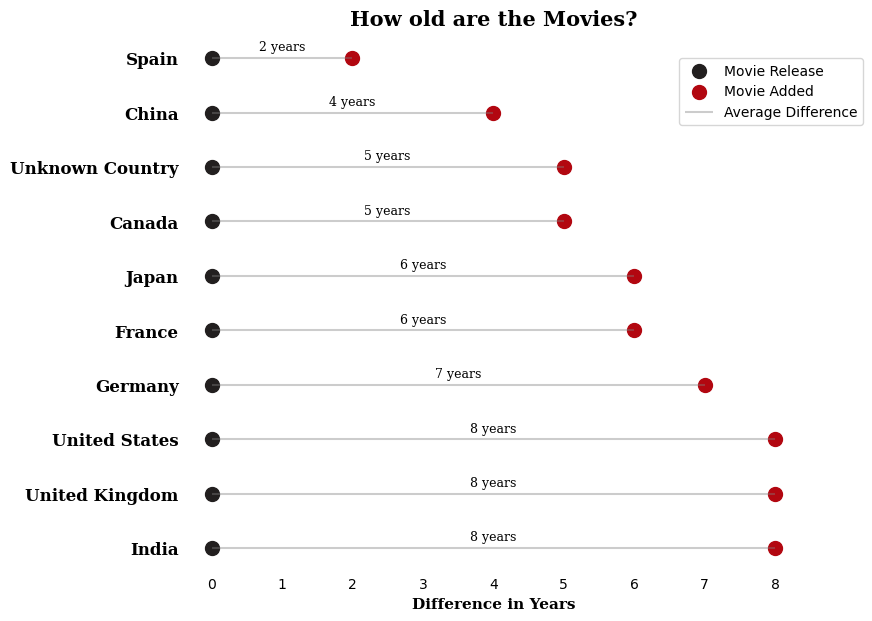

In [62]:
# Creating y-axis coordinates
yrange = range(1, len(movie_year) + 1)
xrange = [0 for _ in range(len(movie_year))]

# Setting the plot style
fig, ax = plt.subplots(figsize=(8, 7))

# Plotting the scatter points
ax.scatter(xrange, yrange, color='#221f1f', s=100, label='Movie Release')
ax.scatter(movie_year['diff'], yrange, color='#b20710', s=100, label='Movie Added')

# Plotting the horizontal lines between the points
ax.hlines(
    yrange,
    xmin=0,
    xmax=movie_year['diff'],
    color='grey',
    alpha=0.4,
    label='Average Difference'
)

# Adding average difference values on lines
for i in range(len(movie_year)):
    ax.text(
        movie_year['diff'].iloc[i] / 2,
        yrange[i] + 0.2,
        f"{movie_year['diff'].iloc[i]} years",
        fontdict={'font': 'serif', 'size': 9, 'fontweight': 'light'},
        ha='center',
        va='center'
    )

# Removing the axis lines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing tick marks but keeping the labels
ax.tick_params(axis='both', length=0)

# Customizing the y-axis labels
ax.set_yticks(yrange)
ax.set_yticklabels(movie_year['country'], fontsize=12, fontfamily='serif', fontweight='bold')

# Adding X-axis label
ax.set_xlabel('Difference in Years', fontfamily='serif', fontsize=11, fontweight='bold')

# Adding title to the graph
ax.set_title('How old are the Movies?', fontdict={'font': 'serif', 'size': 15, 'weight': 'bold'})

# Adding legend
plt.legend(loc=(0.8, 0.83))

plt.show()

*Mode for the difference is 8 years, depicting lag between release and movie date added to netfl ix is 8 years.
*Egypt country stays behind in adding movies on netfl ix i.e. 14years.
*Whereas countries like Spain and China take 2 and 4 years in adding the movies which is relatively faster.
Insights
keyboard_arrow_down
1.

**Business Insights Summary:**

 **1.Quantity of Content:
Netfl ix predominantly offers more fi lms than TV shows, aligning with expectations given fi lms' broader appeal.
2.Content Addition Strategy:
Netfl ix strategically adds the most content in July and December, likely timed for seasonal viewing peaks.
3.Genre Correlations:
Positive correlations exist between TV dramas, international TV shows, romantic TV shows, independent fi lms, anddramas, refl ecting viewer preferences and content connections.
4.Movie Length Trends:
Movie durations peaked around the 1960s and then stabilized around 100 minutes, indicating evolving trends in fi lmlengths over time.
5.TV Show Season Length: Netflix's TV shows typically consist of a single season, suggesting a preference for shorter series among viewers.
6.Common Themes: Titles and descriptions frequently feature themes such as love, life, family, and adventure, highlighting recurring motifs in
Netflix's content.
7.Rating Distribution Insights: Analyzing rating distributions over time offers valuable insights into changing audience preferences and content
reception.
8.Data-Driven Decision Making: This analysis showcases the power of data in unraveling Netflix's content landscape, benefiting both viewers
and creators.
9.Understanding Streaming Patterns: Staying abreast of streaming patterns and trends is essential for navigating Netflix's extensive content
library effectively.
10.Conclusion: We hope this summary provides informative and enjoyable insights into Netflix's diverse content. Let data guide your streaming
experience and explore the rich offerings on Netflix!**

**Business Recommendations**

**1.Emphasize TV Shows: Netflix should prioritize TV shows given the audience preference for this format over films.
2.Collaborate with Top Directors: Engage top directors to develop more movies and TV shows, leveraging their reputation to boost content
popularity.
3.Support Emerging Directors: Explore collaborations with directors who have fewer movies but high ratings, offering them opportunities to
create compelling content for Netflix.
4.Diversify Genre Focus: Expand beyond international movie genres and prioritize genres like horror, comedy, and others to cater to diverse
viewer interests.
5.Expand TV Show Seasons: Consider focusing on thriller genres to increase the number of seasons for TV shows and sustain viewer
engagement.
6.Strategic Release Dates: Optimize OTT (over-the-top) platform releases during festival holidays, year-end, and weekends to maximize
viewership and subscription benefits.
7.Leverage Positive Reviews: Directly release films with positive reviews to drive subscription growth and enhance customer satisfaction.
8.Harness Popular Actor Fanbases: Use popular actors' fan bases to promote TV shows or web series, especially in regions with limited film
releases, to broaden Netflix's global reach.
9.Create Localized Content: Develop native TV shows tailored to local audiences to enhance engagement and appeal in specific regions.
These recommendations aim to enhance Netflix's content strategy, attract a wider audience, and strengthen the platform's competitive position
in the streaming market.**